In [77]:
%matplotlib inline

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [ ]:
# Bernt's code starts here

In [3]:
# Importing necessary dataframes

birthrate_csv = "../project-one/Resources/children_per_woman_total_fertility.csv"
birthrate_df = pd.read_csv(birthrate_csv)
birthrate_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [4]:
co2_csv = "../project-one/Resources/co2_emissions_tonnes_per_person.csv"
co2_df = pd.read_csv(co2_csv)
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [ ]:
new_df = co2_df.T
new_df['1800']

In [5]:
income_csv = "../project-one/Resources/income_per_person_gdppercapita_ppp_inflation_adjusted.csv"
income_df = pd.read_csv(income_csv)
income_df.head()
# units are in dollars, I believe

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [6]:
population_csv = "../project-one/Resources/population_total.csv"
population_df = pd.read_csv(population_csv)
population_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [ ]:
# For reference only:
# these are the years we are interested in:  [1804, 1834, 1864, 1894, 1824, 1954, 1984, and 2014]

In [ ]:
# Step 2: Merge the data...BUT FIRST!! To prep for an inner join (where the only data merged is
# whatever matches in our reference columns), we can dropna() first, and then merge

# Removing "not a number's"

#birthrate_df = birthrate_df.dropna()
#co2_df = co2_df.dropna()

In [ ]:
# Step 3: Clean the data (dropna, isolate the specific year columns we're interested in)

In [ ]:
# Step 4: Plot our data with CO2 emissions on the x-axis, and birthrate on the y-axis
# BONUS: try formatting dot size by population or income level

In [ ]:
# Bernt's code ends here

In [ ]:
# Kaan's code starts here

In [ ]:
# Kaan's code ends here

In [ ]:
# Molly's code starts here

In [7]:
#reshape the income dataframe to show every Country|Year with the income for that year (using group by looked nice but didn't cut it) 
df_meltInc =income_df.melt(id_vars=['country'], var_name='year', value_name='income')
df_meltInc = df_meltInc.dropna()
df_meltInc

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
46508,Venezuela,2040,17600
46509,Vietnam,2040,12300
46510,Yemen,2040,3960
46511,Zambia,2040,6590


In [36]:
#take the reshaped income values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltInc['combined'] = df_meltInc[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltInc

,country,year,income,combined
0,Afghanistan,1800,603,Afghanistan 1800
1,Albania,1800,667,Albania 1800
2,Algeria,1800,715,Algeria 1800
3,Andorra,1800,1200,Andorra 1800
4,Angola,1800,618,Angola 1800
...,...,...,...,...
46508,Venezuela,2040,17600,Venezuela 2040
46509,Vietnam,2040,12300,Vietnam 2040
46510,Yemen,2040,3960,Yemen 2040
46511,Zambia,2040,6590,Zambia 2040


In [37]:
#take the reshaped co2 values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltCO2['combined'] = df_meltInc[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltCO2

,country,year,co2,combined
30,Canada,1800,0.00568,Canada 1800
63,Germany,1800,0.03480,Germany 1800
136,Poland,1800,0.04280,Poland 1800
182,United Kingdom,1800,2.16000,United Arab Emirates 1800
183,United States,1800,0.03720,United Kingdom 1800
...,...,...,...,...
41275,Venezuela,2014,6.03000,Sweden 2013
41276,Vietnam,2014,1.80000,Switzerland 2013
41277,Yemen,2014,0.86500,Syria 2013
41278,Zambia,2014,0.28800,Tajikistan 2013


In [42]:
#merge the reshaped income and co2
merge_inc_co2_df = pd.merge(df_meltInc,df_meltCO2, on="combined", how="inner")
merge_inc_co2_df = merge_inc_co2_df.drop('country_x', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('year_x', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('country_y', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('year_y', axis=1)
merge_inc_co2_df

,income,combined,co2
0,1310,Canada 1800,0.00568
1,1640,Germany 1800,0.03480
2,1210,Poland 1800,0.04280
3,998,United Arab Emirates 1800,2.16000
4,3430,United Kingdom 1800,0.03720
...,...,...,...
16839,43500,Sweden 2013,6.03000
16840,56300,Switzerland 2013,1.80000
16841,5000,Syria 2013,0.86500
16842,2440,Tajikistan 2013,0.28800


In [54]:
#get the log of the income so the span of the plot isn't so wide
merge_inc_co2_df['log income'] = np.log10(merge_inc_co2_df['income'])
merge_inc_co2_df.head()

,income,combined,co2,log income
0,1310,Canada 1800,0.00568,3.117271
1,1640,Germany 1800,0.03480,3.214844
2,1210,Poland 1800,0.04280,3.082785
3,998,United Arab Emirates 1800,2.16000,2.999131
4,3430,United Kingdom 1800,0.03720,3.535294


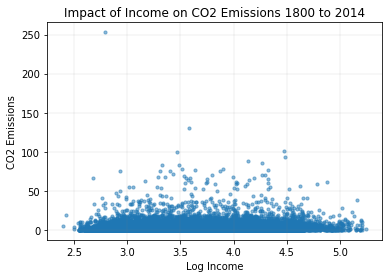

In [78]:
x_axis = merge_inc_co2_df["log income"]
y_axis = merge_inc_co2_df["co2"]
plt.xlabel("Log Income")
plt.ylabel("CO2 Emissions")
plt.title("Impact of Income on CO2 Emissions 1800 to 2014")
#plt.text(25, 9, r'Marker size = population', fontsize=8)
#plt.text(25, 8, r'Marker color = per capita income', fontsize=8)
#plt.xlim(0,50)
#plt.ylim(0,10)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.scatter(x_axis, y_axis, alpha=0.5, s=10)
#c=merge_inc_co2_df['Income'],s = final_merge_1804_df['Population']/scale_variable)
#plt.savefig("ImpactIncomeOnCO2.png", dpi=150)
plt.show()

In [57]:
print(merge_inc_co2_df['income'].mean())
print(merge_inc_co2_df['income'].median())
print(merge_inc_co2_df['income'].mode())

8022.789836143434
2910.0
0    1190
dtype: int64


In [58]:
print(merge_inc_co2_df['co2'].mean())
print(merge_inc_co2_df['co2'].median())
print(merge_inc_co2_df['co2'].mode())

3.3348209166468856
0.968
0    1.14
dtype: float64


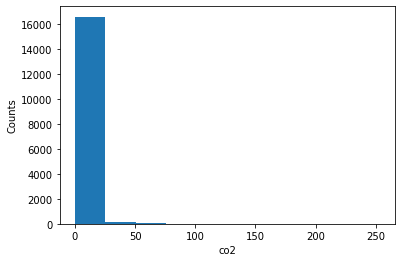

NormaltestResult(statistic=115.3456757918346, pvalue=8.974386019295274e-26)


In [79]:
# Determine if the co2 emissions is normally distributed
plt.hist(merge_inc_co2_df['co2'])
plt.xlabel('co2')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(merge_inc_co2_df["co2"].sample(100)))

In [66]:
#reshape the population dataframe to show every Country|Year with the population for that year (using group by looked nice but didn't cut it) 
df_meltPop = population_df.melt(id_vars=['country'], var_name='year', value_name='population')
df_meltPop = df_meltPop.dropna()
df_meltPop

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,410000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000
...,...,...,...
58690,Venezuela,2100,41600000
58691,Vietnam,2100,108000000
58692,Yemen,2100,53500000
58693,Zambia,2100,94400000


In [68]:
#take the reshaped population values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltPop['combined'] = df_meltPop[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltPop

,country,year,population,combined
0,Afghanistan,1800,3280000,Afghanistan 1800
1,Albania,1800,410000,Albania 1800
2,Algeria,1800,2500000,Algeria 1800
3,Andorra,1800,2650,Andorra 1800
4,Angola,1800,1570000,Angola 1800
...,...,...,...,...
58690,Venezuela,2100,41600000,Venezuela 2100
58691,Vietnam,2100,108000000,Vietnam 2100
58692,Yemen,2100,53500000,Yemen 2100
58693,Zambia,2100,94400000,Zambia 2100


In [67]:
#reshape the birthrate dataframe to show every Country|Year with the birthrate for that year (using group by looked nice but didn't cut it) 
df_meltBirth = birthrate_df.melt(id_vars=['country'], var_name='year', value_name='birth rate')
df_meltBirth = df_meltBirth.dropna()
df_meltBirth

,country,year,birth rate
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00
...,...,...,...
40291,Venezuela,2018,2.27
40292,Vietnam,2018,1.95
40293,Yemen,2018,3.79
40294,Zambia,2018,4.87


In [70]:
#take the reshaped birth rate values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltBirth['combined'] = df_meltBirth[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltBirth

,country,year,birth rate,combined
0,Afghanistan,1800,7.00,Afghanistan 1800
1,Albania,1800,4.60,Albania 1800
2,Algeria,1800,6.99,Algeria 1800
3,Angola,1800,6.93,Angola 1800
4,Antigua and Barbuda,1800,5.00,Antigua and Barbuda 1800
...,...,...,...,...
40291,Venezuela,2018,2.27,Venezuela 2018
40292,Vietnam,2018,1.95,Vietnam 2018
40293,Yemen,2018,3.79,Yemen 2018
40294,Zambia,2018,4.87,Zambia 2018


In [71]:
#merge the reshaped population and birth rate
merge_pop_birth_df = pd.merge(df_meltPop,df_meltBirth, on="combined", how="inner")
merge_pop_birth_df = merge_pop_birth_df.drop('country_x', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('year_x', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('country_y', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('year_y', axis=1)
merge_pop_birth_df

,population,combined,birth rate
0,3280000,Afghanistan 1800,7.00
1,410000,Albania 1800,4.60
2,2500000,Algeria 1800,6.99
3,1570000,Angola 1800,6.93
4,37000,Antigua and Barbuda 1800,5.00
...,...,...,...
40291,32400000,Venezuela 2018,2.27
40292,96500000,Vietnam 2018,1.95
40293,28900000,Yemen 2018,3.79
40294,17600000,Zambia 2018,4.87


In [73]:
#merge the income/co2 dataframe to the population/birth rate dataframe
merge_all_df = pd.merge(merge_pop_birth_df,merge_inc_co2_df, on="combined", how="inner")
merge_all_df

,population,combined,birth rate,income,co2,log income
0,646000,Canada 1800,5.72,1310,0.00568,3.117271
1,22900000,Germany 1800,5.40,1640,0.03480,3.214844
2,9510000,Poland 1800,6.28,1210,0.04280,3.082785
3,40200,United Arab Emirates 1800,6.94,998,2.16000,2.999131
4,12300000,United Kingdom 1800,4.97,3430,0.03720,3.535294
...,...,...,...,...,...,...
16058,9620000,Sweden 2013,1.92,43500,6.03000,4.638489
16059,8130000,Switzerland 2013,1.53,56300,1.80000,4.750508
16060,19800000,Syria 2013,3.07,5000,0.86500,3.698970
16061,8180000,Tajikistan 2013,3.47,2440,0.28800,3.387390


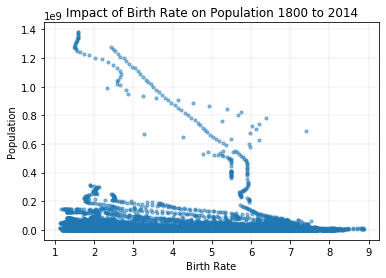

In [80]:
x_axis = merge_all_df["birth rate"]
y_axis = merge_all_df["population"]
plt.xlabel("Birth Rate")
plt.ylabel("Population")
plt.title("Impact of Birth Rate on Population 1800 to 2014")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.scatter(x_axis, y_axis, alpha=0.5, s=10)
#plt.savefig("ImpactIncomeOnCO2.png", dpi=150)
plt.show()

The below cells are work that I tried but didn't find the results I was after

In [9]:
#melt the co2 dataframe to show every Country|Year with the co2 for that year -- then group by year and country
df_meltCO2 =co2_df.melt(id_vars=['country'], var_name='year', value_name='co2')
df_meltCO2 = df_meltCO2.dropna()
df_meltCO2.groupby(['year','country']).sum()

co2
year country                
1800 Canada          0.00568
     Germany         0.03480
     Poland          0.04280
     United Kingdom  2.16000
     United States   0.03720
...                      ...
2014 Venezuela       6.03000
     Vietnam         1.80000
     Yemen           0.86500
     Zambia          0.28800
     Zimbabwe        0.78000

[16844 rows x 1 columns]

In [12]:
#merge the melted income and co2
merge_inc_co2_df = pd.merge(df_meltInc,df_meltCO2, left_on="year", right_on="country", how="inner")
merge_inc_co2_df

,country_x,year_x,income,country_y,year_y,co2


I don't think melt is the function I want to use to reshape the columns. The merged result isn't getting the result I'm after, which is the index of year listing the country|CO2|Income

In [ ]:
df_col = pd.concat([income_df,co2_df], axis=1)
df_col

In [16]:
#try the merge first
merge_orig_df = pd.merge(income_df,co2_df, on="country", how="inner")
merge_orig_df

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299
1,Albania,667,667,667,667,667,668,668,668,668,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960
2,Algeria,715,716,717,718,719,720,721,722,723,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.920,5.900,5.830
4,Angola,618,620,623,626,628,631,634,637,640,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,682,682,682,682,682,682,682,682,682,...,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030
187,Vietnam,861,861,861,861,861,861,861,861,862,...,1.1600,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800
188,Yemen,877,879,882,884,887,889,892,894,897,...,0.9740,1.0100,0.9640,0.999,1.070,0.993,0.811,0.749,0.997,0.865
189,Zambia,663,665,667,668,670,671,673,675,676,...,0.1900,0.1850,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288


In [ ]:
#melt the merged orig dataframe to get Year|Country|Income|CO2
df_meltOrig =merge_orig_df.melt(id_vars=['country'], var_name='1800_x', value_name='country')
#df_meltOrig = df_meltOrig.dropna()
df_meltOrig

Make a giant dataframe that has Year as the index. Then columns would be Country, Income, 
CO2 (or whatever). Then make a new column that computes the ratio of Income to CO2. Then make another dataframe 
for each country. Then plot year and ratio using a line chart.Then you could look at the richest/poorest/least populous countries on a couple different charts

In [ ]:
#turns out I don't need to concat the country and year because I don't need to label to points that are plotted. So when
#I merge the 2 unpivoted dataframes I can then do the plot. Then maybe I can do regression to see what's up there.
country = pd.Series(df_unpivotedCO2['country'])
year = pd.Series(df_unpivotedCO2['year'])
pd.concat([country, year],ignore_index=True)


In [ ]:
#didn't work--come back to this after you fix the concat
#merge the unpivoted 1894 dataframes
merge_1894_df = pd.merge(df_unpivotedInc,df_unpivotedCO2, on="country", how="inner")
merge_1894_df

In [ ]:
#then merge those two pivots and plot all those points using income as X and co2 as Y

In [ ]:
#pull out 1864 birthrate per country
birthrate_1864_df = birthrate_df[["country", "1864"]]
birthrate_1864_df.head()

In [ ]:
#pull out 1864 CO2 per country
co2_1864_df = co2_df[["country", "1864"]]
co2_1864_df.head()

In [ ]:
#merge co2 and birthrate for 1864
merge_brate_co2_1864_df = pd.merge(birthrate_1864_df,co2_1864_df, on="country", how="right")
merge_brate_co2_1864_df = merge_brate_co2_1864_df.dropna()
merge_brate_co2_1864_df.head()

In [ ]:
#rename the columns
renamed_df=merge_brate_co2_1864_df.rename(columns={"1864_x":"1864 Birthrate", "1864_y":"1864 CO2"})
renamed_df.head()

In [ ]:
#Molly--continue to merge the dataframes so you ultimately have one dataframe with a column for each 
#data (population and income). Then make a scatter plot to see what that looks like -- think about other
#plots that would make sense and what other questions to ask

In [ ]:
#pull out 1864 income for each country
income_1864_df = income_df[["country", "1864"]]
income_1864_df.head()

In [ ]:
#pull out the 1864 population for each country
pop_1864_df = population_df[["country", "1864"]]
pop_1864_df.head()

In [ ]:
#merge income and population for 1864
merge_inc_pop_1864_df = pd.merge(income_1864_df,pop_1864_df, on="country", how="right")
merge_inc_pop_1864_df = merge_inc_pop_1864_df.dropna()
merge_inc_pop_1864_df.head()

In [ ]:
#rename the columns
renamedPI_df=merge_inc_pop_1864_df.rename(columns={"1864_x":"1864 income", "1864_y":"1864 population"})
renamedPI_df.head()

In [ ]:
#merge all 4 for 1864
merge_all_1864_df = pd.merge(renamedPI_df,renamed_df, on="country", how="right")
merge_all_1864_df

In [ ]:
#Then make a scatter plot to see what that looks like -- think about other plots that would make 
# sense and what other questions to ask

In [ ]:
#pull out 1894 birthrate per country
birthrate_1894_df = birthrate_df[["country", "1894"]]
birthrate_1894_df

In [ ]:
#pull out 1894 CO2 per country
co2_1894_df = co2_df[["country", "1894"]]
co2_1894_df

In [ ]:
#merge co2 and birthrate for 1894
merge_brate_co2_1894_df = pd.merge(birthrate_1894_df,co2_1894_df, on="country", how="right")
#merge_brate_co2_1894_df = merge_brate_co2_1894_df.dropna()
len(merge_brate_co2_1894_df)

In [ ]:
#rename the columns
renamed94a_df=merge_brate_co2_1894_df.rename(columns={"1894_x":"1894 Birthrate", "1894_y":"1894 CO2"})
renamed94a_df.head()

In [ ]:
#pull out 1894 income for each country
income_1894_df = income_df[["country", "1894"]]
income_1894_df.head()

In [ ]:
#pull out the 1894 population for each country
pop_1894_df = population_df[["country", "1894"]]
pop_1894_df.head()

In [ ]:
#merge income and population for 1894
merge_inc_pop_1894_df = pd.merge(income_1894_df,pop_1894_df, on="country", how="inner")
merge_inc_pop_1894_df = merge_inc_pop_1894_df.dropna()
merge_inc_pop_1894_df

In [ ]:
#rename the columns
renamedPI94_df=merge_inc_pop_1894_df.rename(columns={"1894_x":"1894 income", "1894_y":"1894 population"})
renamedPI94_df.head()

In [ ]:
#can the join type change to get more data?
#merge all 4 for 1894
merge_all_1894_df = pd.merge(renamedPI94_df,renamed94a_df, on="country", how="inner")
merge_all_1894_df

In [ ]:
# Molly's code stops here

In [ ]:
# Vallie's code starts here

In [ ]:
# Vallie's code stops here